In [5]:
%matplotlib inline
import pandas as pd

In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [8]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


### Notes 

In [12]:
# datetime operations is the .dt namespace, ONLY SERIES HAVE .dt
r = release_dates
r.date.dt.year.head()

0    2007
1    2015
2    2015
3    2015
4    2016
Name: date, dtype: int64

In [17]:
# Merge, merge has extra keyword arguments you can give it to specify columns

c = cast
c = c[c.name == 'Ellen Page']
c.merge(release_dates).head()

,title,year,name,type,character,n,country,date
0,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Sweden,2007-12-07
1,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Greece,2008-05-15
2,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Spain,2008-06-13
3,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Finland,2008-07-18
4,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Mexico,2008-08-08


In [20]:
# Pivot does set_index, sort_index, and an unstack operation in one

r = release_dates
r = r[r.title.str.startswith('Star Wars: Episode')]
r = r[r.country.str.startswith('U')]
r.pivot('title', 'country', 'date')

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars: Episode I - The Phantom Menace,1999-07-15,1999-05-19,NaT,1999-08-25,1999-07-02
Star Wars: Episode II - Attack of the Clones,2002-05-16,2002-05-16,2002-06-08,2002-05-16,2002-07-05
Star Wars: Episode III - Revenge of the Sith,2005-05-19,2005-05-19,NaT,2005-05-19,2005-05-18
Star Wars: Episode IX,2019-06-21,2019-05-24,NaT,NaT,NaT
Star Wars: Episode V - The Empire Strikes Back,1980-05-21,1980-06-20,NaT,NaT,1981-01-15
Star Wars: Episode VI - Return of the Jedi,1983-06-02,1983-05-25,NaT,NaT,1984-01-01
Star Wars: Episode VII - The Force Awakens,2015-12-17,2015-12-18,2015-12-17,2015-12-17,2015-12-17


In [22]:
# Can merge with the same table
c = cast
c = c[c.n <= 2]
c = c[c.name == 'Cary Grant']
c.head()

,title,year,name,type,character,n
862666,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1.0
862667,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0
862668,Big Brown Eyes,1936,Cary Grant,actor,Danny Barr,1.0
862670,Born to Be Bad,1934,Cary Grant,actor,Malcolm Trevor,2.0
862671,Bringing Up Baby,1938,Cary Grant,actor,David,2.0


In [28]:
#c = c.merge(cast, on=['title', 'year'])
#c = c[c.n_y <= 2]
#c = c[c.name_y != 'Cary Grant']




### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

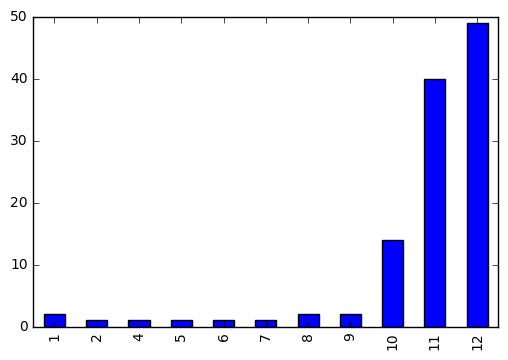

In [29]:
rd = release_dates
rd = rd[rd.title.str.contains('Christmas')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

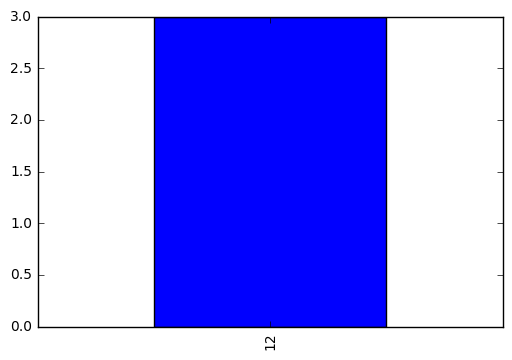

In [30]:
rd = release_dates
rd = rd[rd.title.str.startswith('The Hobbit')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

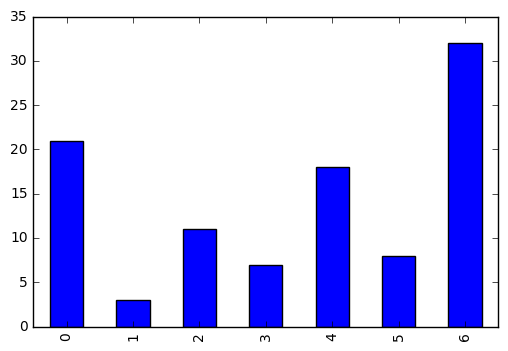

In [31]:
rd = release_dates
rd = rd[rd.title.str.contains('Romance')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

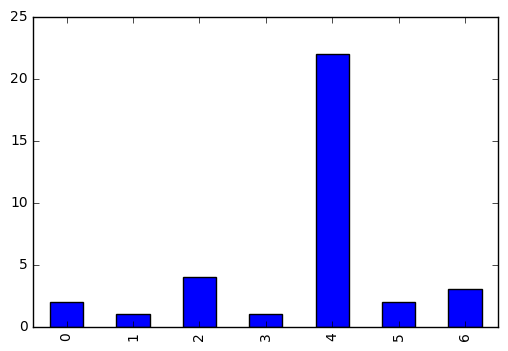

In [32]:
rd = release_dates
rd = rd[rd.title.str.contains('Action')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [34]:
usa = release_dates[release_dates.country == 'USA']

c = cast
c = c[c.name == 'Judi Dench']
c = c[c.year // 10 * 10 == 1990]
c.merge(usa).sort_values(by='date')

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

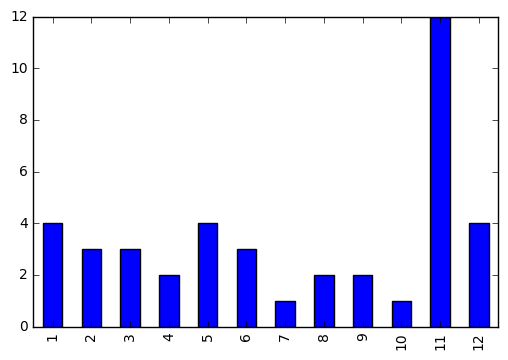

In [36]:
c = cast
c = c[c.name == 'Judi Dench']
m = c.merge(usa).sort_values(by='date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

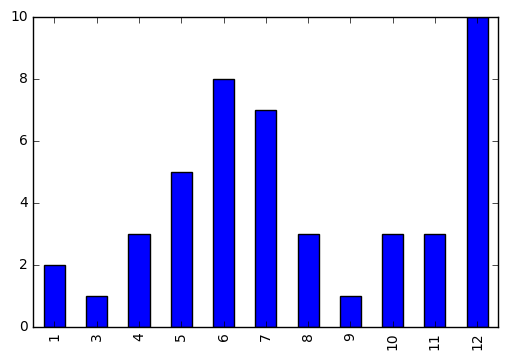

In [37]:
c = cast
c = c[c.name == 'Tom Cruise']
m = c.merge(usa).sort_values(by='date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')